# Recurrent Neural Network

## Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
# mengambil nilai (numpy) pada kolom yang interest (open/kolom ke 1), karena untuk predict harus dalam bentuk numeri(numpy)
training_set = dataset_train.iloc[:, 1:2].values   

In [21]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
print(min(training_set))
print(max(training_set))

[279.12]
[816.68]


### Feature Scaling

In [4]:
## Feature Scaling (Normalization)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
print(training_set_scaled[0:60])

[[0.08581368]
 [0.09701243]
 [0.09433366]
 [0.09156187]
 [0.07984225]
 [0.0643277 ]
 [0.0585423 ]
 [0.06568569]
 [0.06109085]
 [0.06639259]
 [0.0614257 ]
 [0.07474514]
 [0.02797827]
 [0.02379269]
 [0.02409033]
 [0.0159238 ]
 [0.01078949]
 [0.00967334]
 [0.01642607]
 [0.02100231]
 [0.02280676]
 [0.02273235]
 [0.02810849]
 [0.03212665]
 [0.0433812 ]
 [0.04475779]
 [0.04790163]
 [0.0440695 ]
 [0.04648783]
 [0.04745517]
 [0.04873875]
 [0.03936305]
 [0.04137213]
 [0.04034898]
 [0.04784582]
 [0.04325099]
 [0.04356723]
 [0.04286033]
 [0.04602277]
 [0.05398467]
 [0.05738894]
 [0.05714711]
 [0.05569611]
 [0.04421832]
 [0.04514845]
 [0.04605997]
 [0.04412531]
 [0.03675869]
 [0.04486941]
 [0.05065481]
 [0.05214302]
 [0.05612397]
 [0.05818885]
 [0.06540665]
 [0.06882953]
 [0.07243843]
 [0.07993526]
 [0.07846566]
 [0.08034452]
 [0.08497656]]


### Creating a data structure with 60 timesteps and 1 output

In [6]:
## Creating a data structure with 60 timesteps and 1 output
# Note: RNN akan look up (harga saham) 60 hari sebelumnnya, dan berdasarkan trendnya akan memprediksi saham pada waktu T+1 (next day dari X_train)
# Note: X_train akan berisi 60 hari sebelum harga "sekarang" financial days, dan y_train next day dari X_train (untuk prediksinya (60 hari sebelumnya +1)

X_train = []
y_train = []

for i in range (60,1258):                                   ## start dari 60 pertama
    X_train.append(training_set_scaled[i-60:i, 0])          ## untuk i=60 (maka diambil 0:60) dari indeks 0 sampai 59, pada kolom '0'
    y_train.append(training_set_scaled[i,0])                ## untuk i=60 maka diambil indeks ke 60 pada kolom '0'
X_train, y_train = np.array(X_train), np.array(y_train)     #3 mengubahnya kedalam np array


## Note: pada X_train nya (row ke 0 merupakan data pada hari pd index ke 0-59, dan pada row ke=1 merupakan hari pd indeks ke 1-60, dst)


### Reshaping

In [7]:
### Note: kalo mau menambahkan dimensi pd numpy harus melakukan reshaping
### pada np.reshape('data yg mau direshape', 'Bentukan baru')
### dimana bentukan baru dalam hal ini jadi 3D (batch_size = jumlah row, timestamp=jumlah kolom, 'indicator yang diguanakan')
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building and Training the RNN

### Importing the Keras libraries and packages

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


### Initialising the RNN

In [9]:
regressor = Sequential()                       ## namanya regressor karena mengguna regression(continue value, bukan klasifikasi)

### Adding the first LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))                   # unit(jumlah layer neuron), return_sequence=True(kalo ingin menambahkan LSTM lagi), input shape(diisi 2 yaitu time_stamp dan indikatornya pada X_train)
regressor.add(Dropout(0.2))                                                                                     # Dropout regulazation (20% neuron pd layer/unit)

### Adding a second LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True))                # tidak melakukan input shape, karena sudah dilakukan pada first LSTM
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True))   # Third LSTM sama seperti second LSTM
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units = 50))                            # pada last LSTM, return_sequences yang digunakan False(Default), dan unitnya tetep 50 bukan 1 karena ini bukan last neuron dari NN
regressor.add(Dropout(0.2))

### Adding the output layer

In [14]:
regressor.add(Dense(units = 1))                            # Output layer (neuronya 1, karena dimensinya 1 yaitu 'open')     

### Compiling the RNN

In [15]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')      ## loss untuk regression (mean squared error)

### Fitting the RNN to the Training set

In [16]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0413
Epoch 2/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0067
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0056
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0055
Epoch 5/100
1198/1198 [==============================] - ETA: 0s - loss: 0.005 - 8s 6ms/step - loss: 0.0054
Epoch 6/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0047
Epoch 7/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0050
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0057
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0060
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0045
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0039
Epoch 12/100
1198/1198 [==========================

1198/1198 [==============================] - 5s 4ms/step - loss: 0.0016
Epoch 98/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0013
Epoch 100/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0015


## Making the predictions and visualising the results

### Getting the real stock price of 2017

In [17]:
# menggunakan data test set
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [18]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [19]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [20]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

### Getting the predicted stock price of 2017

In [28]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)     # menggabungkan original dataframe (kolom 'open') pada training dan testing
print(len(dataset_train['Open']))
print(len(dataset_test['Open']))
print(len(dataset_total))

1258
20
1278


In [32]:
dataset_total[len(dataset_total) - len(dataset_test) - 60]

779.0

In [33]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values                       # mengambil data T-60 dari hari pertama dataset test(1278[dataset_total] - 20[dataset_test]-60) itu hanyha batas bawah dan untuk mengambil batas atasnya(last day dari january) digunakan ":"


In [34]:
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [35]:
## reshape data dalam bentuk 1 columns array
inputs = inputs.reshape(-1,1)
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [36]:
## scaling (normalisasi)  input tersebut, Note: untuk rnn hanya melakukan scaling pada data train saja, data test(predict) tidak di scaling

inputs = sc.transform(inputs)                         ## note: tidak menggunakan fit_transform karena telah digunakan pada training_set

In [44]:
X_test = []
for i in range (60,80):                                     ## start dari 60 sebelum 3rd january, dan 80(60+20) 20nya yaitu jumlah data pada test set
    X_test.append(inputs[i-60:i, 0])                        ## X_test inputnya pada index ke 60 (3rd january)

X_test = np.array(X_test)                                  ## mengubahnya kedalam np array


In [45]:
X_test

array([[0.9299055 , 0.93113327, 0.92750577, ..., 0.95725128, 0.93796041,
        0.93688146],
       [0.93113327, 0.92750577, 0.94415507, ..., 0.93796041, 0.93688146,
        0.92955205],
       [0.92750577, 0.94415507, 0.93876032, ..., 0.93688146, 0.92955205,
        0.94731751],
       ...,
       [0.96054394, 0.9371419 , 0.92841729, ..., 1.01045465, 1.02407173,
        1.03930724],
       [0.9371419 , 0.92841729, 0.90804747, ..., 1.02407173, 1.03930724,
        1.03354044],
       [0.92841729, 0.90804747, 0.8771858 , ..., 1.03930724, 1.03354044,
        0.99624228]])

In [46]:
## reshaping dalam bentuk 3D
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [47]:
predicted_stock_price = regressor.predict(X_test)                   #prediction

In [48]:
## inverse hasilnya kedalam bentuk original dari bentuk 3D
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [49]:
len(predicted_stock_price)

20

### Visualising the results

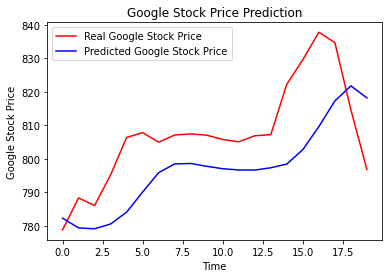

In [50]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()